# I. Sampling of Analog Signals

## I.1 Signals

A **signal** is a measurable quantity which varies in time, space or some other variable.

Examples:
- a voltage which varies in time (1D voltage signal)
- sound pressure which varies in time (sound signal)
- intensity of light which varies across a photo (2D image)

Signals are usually represented as mathematical functions, e.g. $v(t)$.

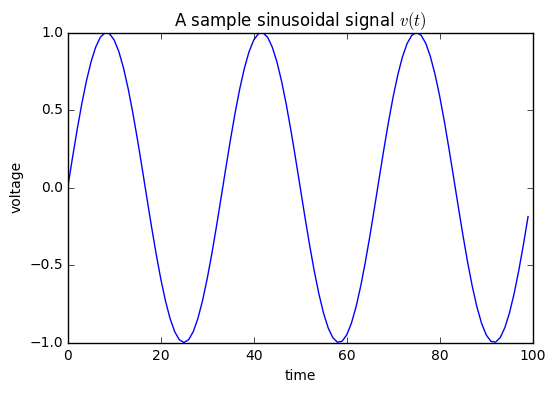

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
t = np.arange(0,100)                 # this means 0,1,2,...100
v = np.sin(2*math.pi*0.03*t)         # sin(2*pi*f*t)
plt.plot(t,v)                        # plotting
plt.xlabel('time')
plt.ylabel('voltage')
plt.title('A sample sinusoidal signal $v(t)$')


### Unidimensional and multidimensional signals

An **unidimensional** (1D) signal is a function of a single variable. Example: a voltage signal $v(t)$ only varies in time.

A **multidimensional** (2D, 3D ... M-D) signal is a function of a multiple variables. Example: intensity of a grayscale image $I(x,y)$ across the surface of a photo.

In these lectures we consider only 1D signals. However, the techniques which you will learn for 1D signals can also be used for multidimensional signals (usually 2D signals, images).


### Analog and discrete signals

**Analog** signals are functions of continuous variables, and there exists a signal value for any value of the variable within the defined range.

**Discrete** signals are functions of discrete variables. These signals have values only at certain discrete values, typically indexed with integer numbers ($x[-1]$, $x[0]$, $x[1]$...)

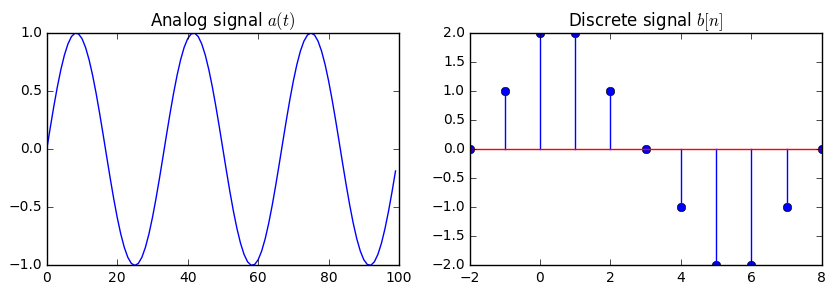

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
tanalog = np.arange(0,100)                 # this means 0,1,2,...100
vanalog = np.sin(2*math.pi*0.03*tanalog)         # sin(2*pi*f*t)
tdiscrete = np.arange(-2, 9)
vdiscrete = np.array([0, 1, 2, 2, 1, 0, -1, -2, -2, -1, 0]) 
plt.figure(figsize=(10, 3));
plt.subplot(121)
plt.plot(tanalog,vanalog); plt.title('Analog signal $a(t)$')
plt.subplot(122)
plt.stem(tdiscrete,vdiscrete); plt.title ('Discrete signal $b[n]$')

The values of a discrete signal are usually called **samples**. Usually, discrete signals have uniform spacing between the samples.

**Note:** A discrete signal has **no value defined** in the space between samples. In these areas, it simply does not exist.

Discrete signals are usually obtained by **sampling** analog signals.

#### Notation

Throughout these lectures, an analog signal is written with **curly braces**, and the variable is typically denoted with $t$ (from _time_), e.g. $a(t)$. 

A discrete signal is written with **square brackets**, and the variable is typically denoted with $n$, or sometimes $k$. The letters _n_ and _k_ are typically used to designate natural numbers, and therefore they suggest the discrete nature of the signal.

Examples: $a(1)$ and $a(3.23542)$ are the values of signal $a(t)$ at time $t=2$ and $t=3.23542$, whereas $b[-1]$ and $b[2]$ are the values of $b[n]$ at discrete time $n=-1$ and $n=2$. Note that $x[1.3]$ is incorrect, because the signal $x[n]$ is only defined for integer values of $n$.

### Signals with continuous and discrete values

Besides the variable of the signal, the value of the signal can also be continuous or discrete.

A signal with continuous values can have any value in a certain defined range. For example, the voltage signal in one point in a usual electronic circuit can take any value between, for example, 0V and 5V.

A signal with discrete values can only have a value from a discrete set of possible values. For example, the number of bits received in a second over a binary communication channel can only be a natural number. 

## I.2 Discrete and analog frequency

A signal is called **periodic** if its values repeat themselves after a certain time (known as **period**).

For an analog signal:
$$x(t) = x(t+T), \forall t$$

For a discrete signal:
$$y[n] = y[n + N]), \forall t$$

The **fundamental period** of a signal is the minimum value of $T$ or $N$. Note that multiples of $T$ or $N$ are also periods ($2T$, $3T$ etc), but we are usually interested only in the fundamental period. Therefore, from now on, by  _period_ we will mean the fundamental period.

Note that for analog signals the period has unit _seconds_, but for digital signals the period is _adimensional_. This is because $T$ is time, but $N$ is just a number and therefore it does not have a unit attached.

The frequency of a signal is defined as the inverse of the period.

For analog signals:
$$F = \frac{1}{T},$$
and the unit is:
$$[F] = \frac{1}{s} = Hz.$$

For discrete signals:
$$f = \frac{1}{N},$$
and it has no unit, since $N$ has no unit also.

We will frequencies of analog signals with $F$ and frequencies of discrete signals with $f$.

Thus, we can say that an analog signal has a frequency of $F = 0.1 Hz$, but a discrete signal has a frequency of $f = 0.1$.

### Pulsation

For harmonic signals, the pulsation is defined as $\omega = 2 \pi f$ for both analog and discrete signals. 

We use $\omega$ when treating harmonic signals like _cos()_ or _sin()_, e.g. $cos(\omega t) = cos(2 \pi f t)$.

### Domain of existence

For analog signals, the period can be as small as desired, $T \to 0$, and therefore the frequency can be very large, $F_{max} = \infty$.

**For discrete signals, the smallest period is $N = 2$** (excluding N=1 which designates a constant signal). Therefore, the largest possible frequency is $f_{max} = \frac{1}{2}$.

Due to mathematical reasons (rememeber SCS class from last year), we will consider negative frequencies as well, mirroring the positive frequencies.

Therefore, the domain of existence for frequencies of analog signals ("analog frequencies") is:
$$F \in (-\infty, \infty),$$
whereas for frequencies of discrete signals ("discrete frequencies") it is:
$$f \in [-\frac{1}{2}, \frac{1}{2}].$$



## I.3 Sampling of analog signals

Discrete signals are usually obtained from analog signals through the process of **sampling**.

Sampling means taking the values from the analog signal at certain discrete moments of time (usually periodic).


[ 0  8 16 24 32 40 48 56 64 72 80 88 96]


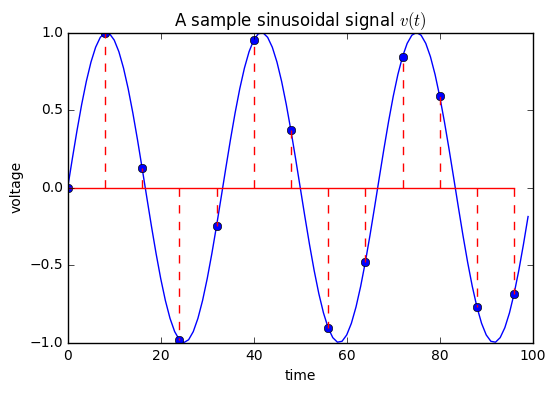

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
t = np.arange(0,100)                 # 
xa = np.sin(2*math.pi*0.03*t)        # analog signal
Ts = 8                               # Sampling period Ts=10, sampling freq Fs = 0.1
td = t[0:101:Ts]                     # go from 0 to 100 with step=Ts, i.e. 0,10,20,...
xd = xa[td]
print td
plt.plot(t,xa)                        # plotting
plt.stem(td,xd,'--r')
plt.xlabel('time')
plt.ylabel('voltage')
plt.title('A sample sinusoidal signal $v(t)$')

The time between two samples is the **sampling period $T_s$**. The corresponding frequency is the **sampling frequency $F_s = \frac{1}{T_s}$**.

### Sampling equation

The process of sampling can be described by the following equation:
$$x[n] = x_a(n \cdot Ts).$$

The $n$-th value in the discrete signal x[n] is the value of the analog signal taken after $n$ sampling periods, at time $t = n T_s$.

### Sampling of harmonic signals

Consider a cosine signal $x_a(t) = cos (2 \pi F t)$, sampled with sampling frequency Fs. What is the resulting discrete signal $x[n]$?

Applying the sampling equation above, we obtain:
$$x[n] = x_a(n \cdot T_s) = x_a(n \cdot \frac{1}{F_s}) = cos(2 \pi F n \frac{1}{Fs}) = cos(2 \pi \frac{F}{Fs} n) = cos(2 \pi f n),$$
where 
$$f = \frac{F}{F_s}$$.

Sampling an analog cosine/sine produces a discrete cosine/sine of similar form, but with discrete frequency $f = \frac{F}{F_s}$.

## I.4 A/D and D/A Conversion

